In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
train_df = pd.read_csv("./data/train.csv")

In [5]:
train_df

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1458208,2636,2392,6,150,17,5,18,11,39,4,17,7,365,3,46,141,9,2,2,38,6,3,2,14,10,3,-1,-1,-1,2,4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^2...,11,36,3
1,0,1393666,2871,6995,6,183,29,5,18,86,37,4,21,3,233,3,87,117,4,2,2,14,4,3,2,28,5,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,6
2,0,2043446,3142,3394,7,207,17,5,11,13,37,4,21,6,437,5,102,141,9,4,2,28,4,3,2,27,12,4,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,5
3,0,1116998,1567,3160,7,164,47,5,14,77,24,4,21,5,309,3,56,141,8,2,2,34,12,3,2,20,8,4,18,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,11,16,1
4,0,1834212,5895,4212,7,205,67,4,16,32,32,4,29,5,221,5,102,141,9,2,2,12,15,3,2,20,12,4,-1,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,51,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006037,0,1001059,2088,2314,6,132,60,3,11,78,23,2,23,6,118,3,38,162,4,4,3,12,-1,-1,1,20,4,4,20,1,-1,7,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,47,2
1006038,1,1290022,4186,4007,7,130,30,4,17,28,39,4,17,5,339,3,45,141,5,2,3,35,6,2,2,20,8,5,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7
1006039,0,1449395,5390,1226,7,177,56,5,17,31,40,4,25,6,292,4,38,162,4,2,2,46,13,3,2,20,4,4,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,13,17,5
1006040,0,1536310,2763,3547,7,156,56,5,16,58,37,4,21,6,437,5,56,141,8,2,2,28,14,3,2,20,8,4,-1,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,7


In [6]:
train_df.shape

(1006042, 36)

In [7]:
train_df.head()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1458208,2636,2392,6,150,17,5,18,11,39,4,17,7,365,3,46,141,9,2,2,38,6,3,2,14,10,3,-1,-1,-1,2,4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^2...,11,36,3
1,0,1393666,2871,6995,6,183,29,5,18,86,37,4,21,3,233,3,87,117,4,2,2,14,4,3,2,28,5,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,6
2,0,2043446,3142,3394,7,207,17,5,11,13,37,4,21,6,437,5,102,141,9,4,2,28,4,3,2,27,12,4,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,5
3,0,1116998,1567,3160,7,164,47,5,14,77,24,4,21,5,309,3,56,141,8,2,2,34,12,3,2,20,8,4,18,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,11,16,1
4,0,1834212,5895,4212,7,205,67,4,16,32,32,4,29,5,221,5,102,141,9,2,2,12,15,3,2,20,12,4,-1,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,51,6


In [8]:
train_df.tail()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
1006037,0,1001059,2088,2314,6,132,60,3,11,78,23,2,23,6,118,3,38,162,4,4,3,12,-1,-1,1,20,4,4,20,1,-1,7,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,47,2
1006038,1,1290022,4186,4007,7,130,30,4,17,28,39,4,17,5,339,3,45,141,5,2,3,35,6,2,2,20,8,5,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7
1006039,0,1449395,5390,1226,7,177,56,5,17,31,40,4,25,6,292,4,38,162,4,2,2,46,13,3,2,20,4,4,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,13,17,5
1006040,0,1536310,2763,3547,7,156,56,5,16,58,37,4,21,6,437,5,56,141,8,2,2,28,14,3,2,20,8,4,-1,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,7
1006041,0,1337028,5870,2633,7,150,17,5,22,11,39,4,17,5,427,3,54,113,4,2,2,29,6,3,2,12,9,3,18,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,36,1


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006042 entries, 0 to 1006041
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   label                        1006042 non-null  int64 
 1   uid                          1006042 non-null  int64 
 2   task_id                      1006042 non-null  int64 
 3   adv_id                       1006042 non-null  int64 
 4   creat_type_cd                1006042 non-null  int64 
 5   adv_prim_id                  1006042 non-null  int64 
 6   dev_id                       1006042 non-null  int64 
 7   inter_type_cd                1006042 non-null  int64 
 8   slot_id                      1006042 non-null  int64 
 9   spread_app_id                1006042 non-null  int64 
 10  tags                         1006042 non-null  int64 
 11  app_first_class              1006042 non-null  int64 
 12  app_second_class             1006042 non-null  int64 
 1

In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1006042.0,3.447470e-02,0.182445,0.0,0.0,0.0,0.0,1.0
uid,1006042.0,1.618298e+06,357646.527625,1000012.0,1307890.0,1617589.0,1928602.0,2237671.0
task_id,1006042.0,3.436807e+03,1430.209455,1001.0,2229.0,3370.0,4595.0,5992.0
adv_id,1006042.0,3.964326e+03,1720.699871,1001.0,2504.0,4043.0,5461.0,7020.0
creat_type_cd,1006042.0,6.491522e+00,1.229281,2.0,6.0,7.0,7.0,9.0
adv_prim_id,1006042.0,1.593460e+02,30.918500,101.0,134.0,156.0,180.0,214.0
dev_id,1006042.0,4.158758e+01,17.416152,11.0,29.0,37.0,60.0,72.0
inter_type_cd,1006042.0,4.645886e+00,0.711157,2.0,5.0,5.0,5.0,5.0
slot_id,1006042.0,1.525097e+01,3.165633,11.0,12.0,16.0,17.0,22.0
spread_app_id,1006042.0,5.202414e+01,25.091961,11.0,31.0,53.0,78.0,89.0


In [11]:
train_df.label.value_counts()

0    971359
1     34683
Name: label, dtype: int64

In [13]:
label_dist = train_df.label.value_counts()/train_df.shape[0]
label_dist

0    0.965525
1    0.034475
Name: label, dtype: float64

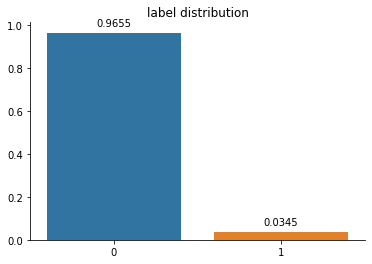

In [14]:
ax = sns.barplot(label_dist.index,label_dist.values);
sns.despine()
plt.title("label distribution")
for p in ax.patches:
    ax.annotate("{:.4f}".format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

CTR is ablout 3.5%

After looking at id columns closely, I discoverd 
1. some features are really ID, some  features are not
2. some id values are actully a feature to another higher level features.

With these two findings I constructed following feature map:

1. users:
    - uid
    - age 
    - city
        - city_rank
        - residence
    - career
    - gender
    - up_life_duration
    - up_membership_grade
    - membership_life_duration
    - consume_purchase
    - communication_onlinerate
    - communication_avgonline_30d
2. ads
    - task_id
    - adv_id
    - creat_type_cd
    - adv_prim_id
    - dev_id
    - inter_typ_cd
    - slot_id
    - indu_name
3. apps
    - spread_app_id
    - tags
    - app_first_class
    - app_second_class
    - his_app_size
    - his_on_shelf_time
    - app_score
4. device
    - device_name
    - device_size
    - emui_dev
    - list_time
    - device_price
6. behavior/event
    - net_type
    - pt_d
   
I will start explore features following this feature map

# User Features

In [20]:
def categorical_analysis(df, col,id_col):
    # value count
    value_counts = df[col].value_counts().sort_index()
    print(f"{col} value counts")
    print(value_counts)
    
    # value count plot
    plt.figure(figsize=(8,5))
    ax = value_counts.plot(kind="bar");
    sns.despine()
    plt.title(f"{col} category count",loc='center')
    plt.xlabel("category")
    plt.xticks(rotation=360)
    plt.ylabel("count")
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    # percentage plot
    plt.figure(figsize=(8,5))
    ax = (value_counts/df.shape[0]).sort_index().plot(kind="bar");
    sns.despine()
    plt.title(f"{col} category proportion",loc='center')
    plt.xlabel(f"{col} category")
    plt.xticks(rotation=360)
    plt.ylabel("percentage")
    for p in ax.patches:
        ax.annotate("{:.2f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    #CTR
    plt.figure(figsize=(8,5))
    agg_df = train_df[[col,'label']].groupby(col).agg(['sum',"count",lambda x: x.sum()/x.count()])
    ax = agg_df['label']['<lambda_0>'].plot(kind='bar');
    sns.despine()
    plt.title(f"CTR in each {col} category")
    plt.xlabel(f'{col} category')
    plt.ylabel('CTR')
    plt.xticks(rotation=360)
    plt.hlines(0.035,ax.axes.get_xlim()[0],ax.axes.get_xlim()[1], linestyles='dashed', colors="r")
    for p in ax.patches:
        ax.annotate("{:.2f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
        
    # click or not click distribution
    plt.figure(figsize=(8,5))
    agg_df = train_df[[col,'label',id_col]].groupby([col,'label']).count().reset_index()
    agg_df = pd.merge(agg_df,agg_df.groupby("label").sum(),left_on='label',right_on=agg_df.groupby("label").sum().index)
    agg_df = agg_df.rename({f"{col}_x":col},axis=1)
    agg_df["pct"] = agg_df[f'{id_col}_x'] / agg_df[f'{id_col}_y']
    ax = sns.barplot(x=col, y="pct", hue="label", data=agg_df);
    sns.despine()
    plt.title(f"Click or Not Click {col} distribution")
    plt.xlabel(f'{col} category')
    plt.ylabel('percentage')
    ax.legend(loc='best')
    plt.xticks(rotation=360)
    for p in ax.patches:
        ax.annotate("{:.4f}".format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
    plt.show()
    
    # chi square
    agg_df = train_df[[col,'label',id_col]].groupby([col,'label']).count().reset_index()
    agg_df = pd.pivot_table(agg_df, values=id_col, index=col, columns='label').fillna(0)
    chi2, p, dof, expect =  chi2_contingency(agg_df)
    print(f"{col} & label chi square test")
    print(f"p-value: {p}")
    print(f"can't reject H0, {col} is independent from label" if p > 0.05 else f"reject H0, {col} and label are dependent")

In [17]:
train_df['communication_onlinerate_start'] = train_df['communication_onlinerate'].str.split("^").str[0]
train_df['communication_onlinerate_end'] = train_df['communication_onlinerate'].str.split("^").str[-1]
train_df["comm_time"] = np.where(train_df['communication_onlinerate_start'] != "-1",
                          train_df['communication_onlinerate_end'].astype(int)\
                             - train_df['communication_onlinerate_start'].astype(int),
                          -1)

In [18]:
feature_map = {"uid": ["age",                 
         "city",
         "city_rank",
         "residence",
         "career",
         "gender",
         "up_life_duration",
         "up_membership_grade",
         "membership_life_duration",
         "consume_purchase",
         "communication_onlinerate_start",
         "communication_onlinerate_end",
         "comm_time",
         "communication_avgonline_30d",
         "net_type",
         "pt_d"
                ],
"task_id": ["creat_type_cd",
                "adv_prim_id",
                "dev_id",
                "inter_type_cd",
                "slot_id",
                "indu_name"],
"spread_app_id" :["tags",
                "app_first_class",
                "app_second_class",
                "his_app_size",
                "his_on_shelf_time",
                "app_score"],
"device_name":["device_size",
                   "emui_dev",
                   "list_time",
                   "device_price"]}

age EDA
age value counts
-1      2682
 1     26432
 2     30436
 3     39829
 4    208247
 5    294791
 6    251261
 7    152364
Name: age, dtype: int64


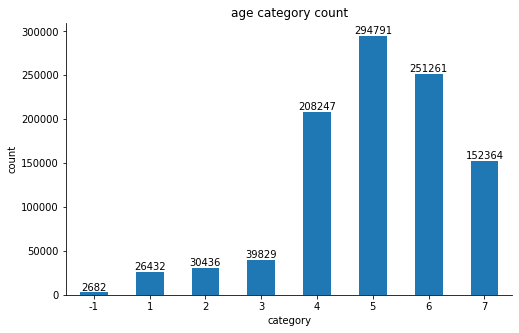

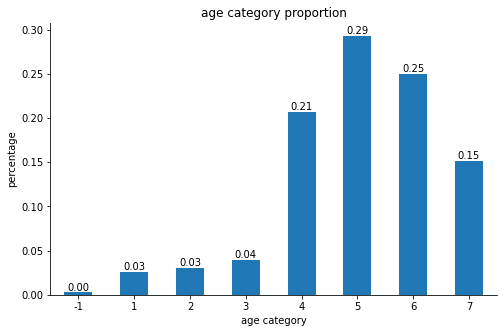

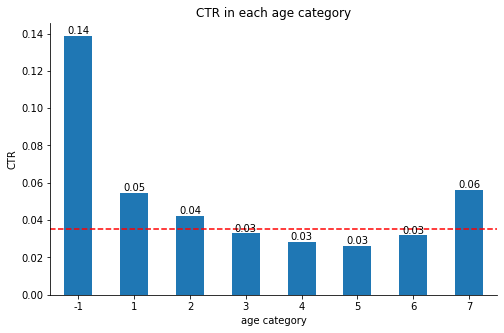

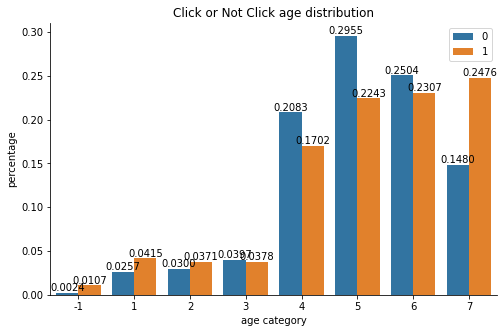

age & label chi square test
p-value: 0.0
reject H0, age and label are dependent




city EDA
city value counts
101    1576
102    1406
103    6287
104    3399
105    6234
       ... 
440     431
441    6854
442      36
443    1742
444    1590
Name: city, Length: 344, dtype: int64


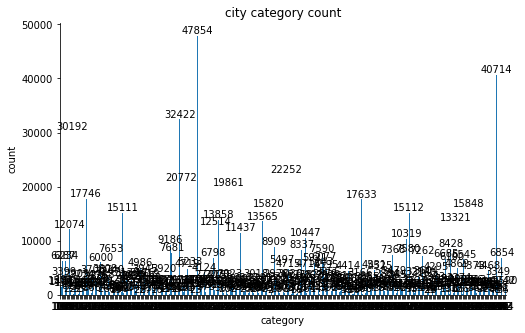

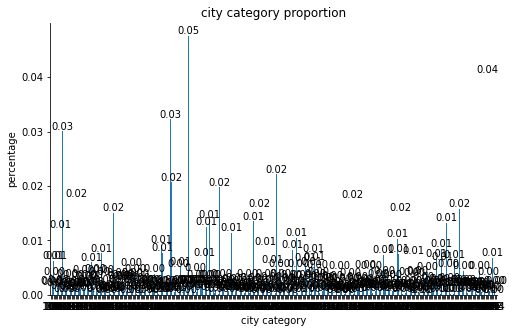

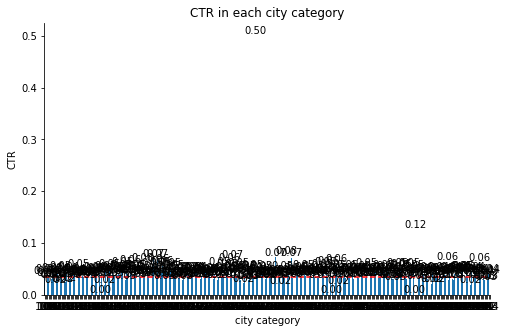

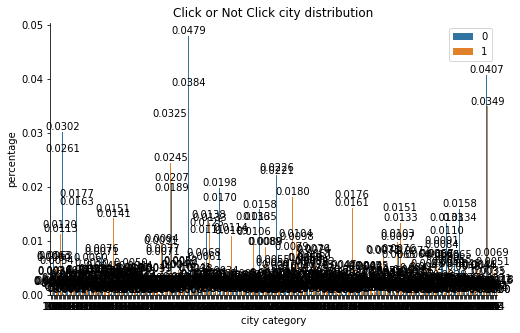

city & label chi square test
p-value: 2.0905176850703617e-128
reject H0, city and label are dependent




city_rank EDA
city_rank value counts
2      9084
3    464026
4    185238
5    347694
Name: city_rank, dtype: int64


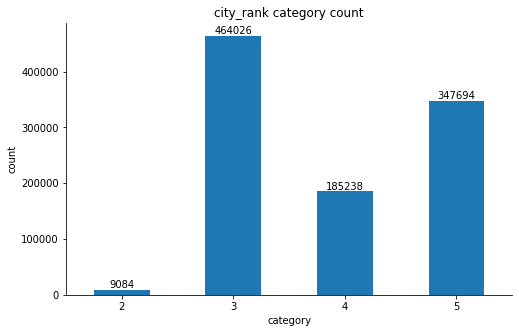

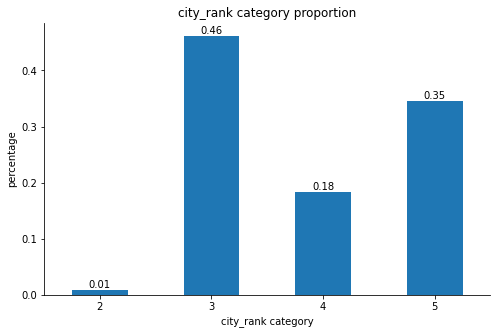

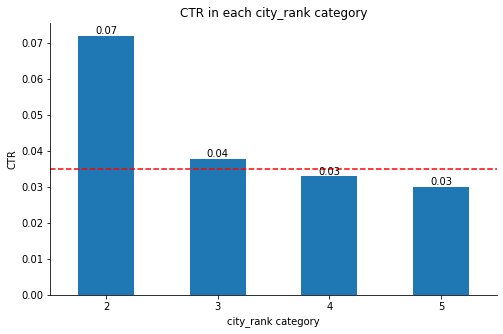

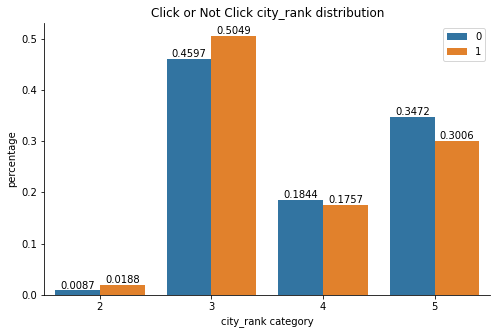

city_rank & label chi square test
p-value: 2.6708386924285205e-163
reject H0, city_rank and label are dependent




residence EDA
residence value counts
11      2580
12     69319
13     23022
14     39965
15     29560
16      1972
17      1840
18     22512
19     14601
20    139980
21     48383
22         2
23     22252
24      9712
25        16
26     15112
27     11614
28     40714
29     30943
30     14190
31        16
32     47854
33      6615
34     90644
35     37310
36      2790
37     52279
38     17037
39     32889
40      9059
41     29733
42     43274
43     14727
44      3917
45     29468
46     50141
Name: residence, dtype: int64


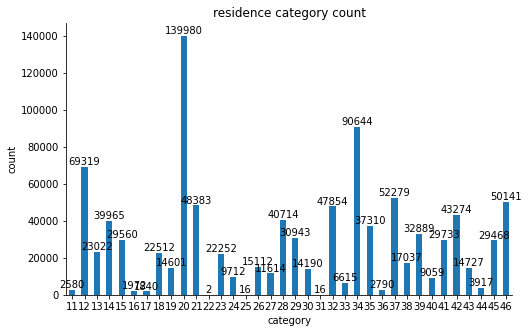

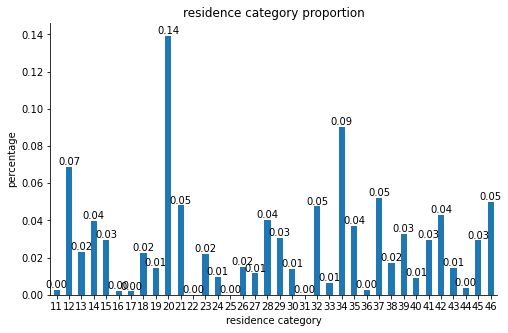

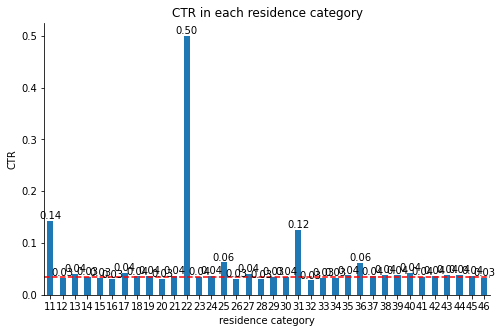

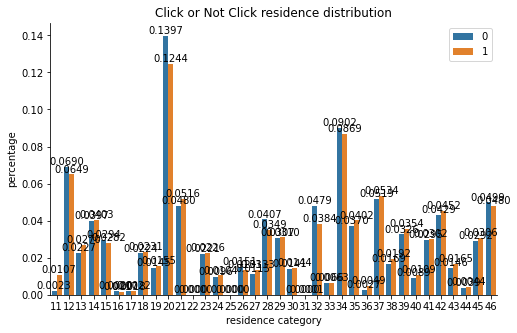

residence & label chi square test
p-value: 1.0679580246904703e-247
reject H0, residence and label are dependent




career EDA
career value counts
2      23075
3      31524
4     426232
5      44958
6      26871
7      23863
8      17401
9     410187
10      1931
Name: career, dtype: int64


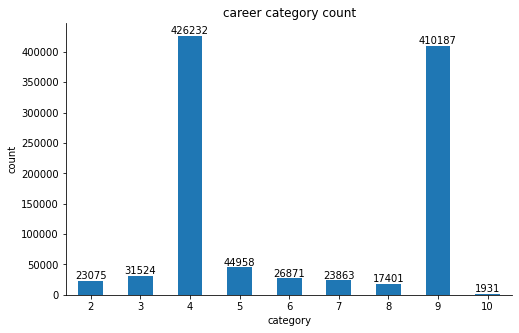

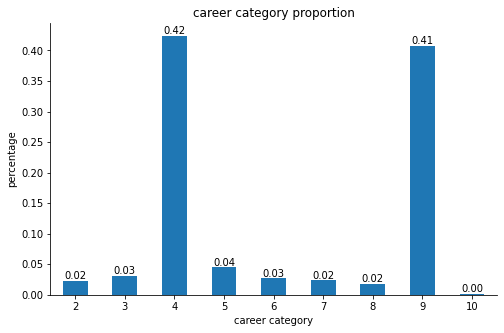

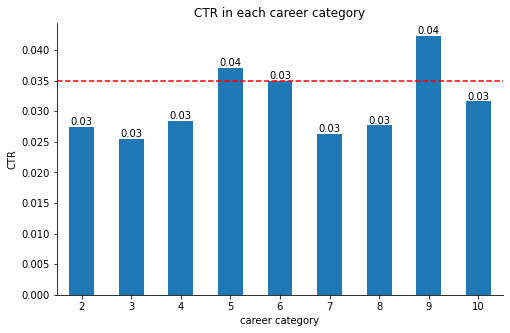

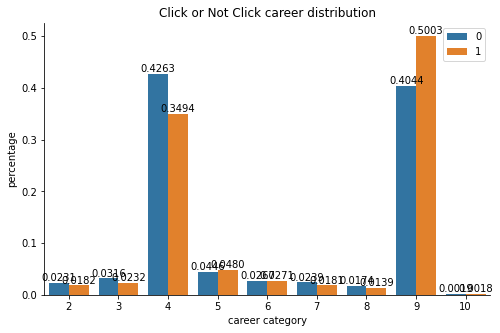

career & label chi square test
p-value: 2.6778290103885873e-300
reject H0, career and label are dependent




gender EDA
gender value counts
2    772726
3     12546
4    220770
Name: gender, dtype: int64


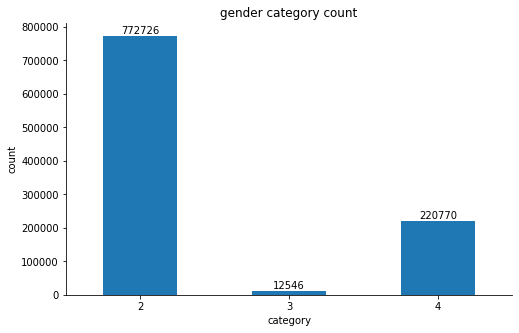

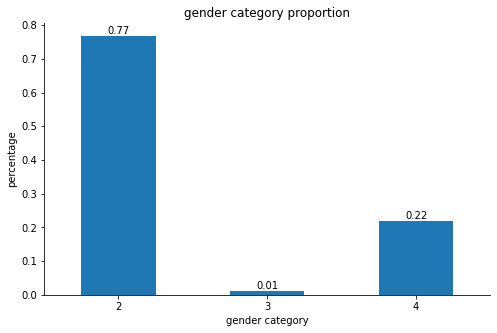

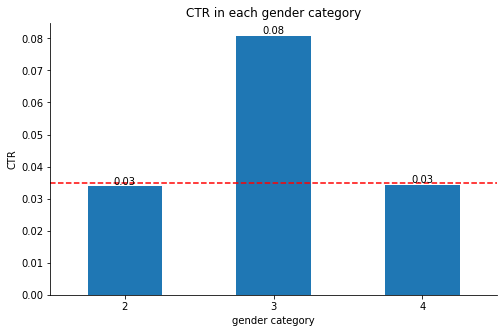

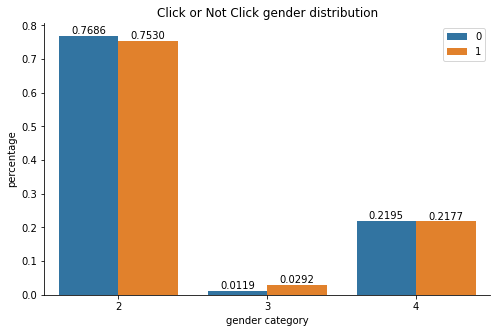

gender & label chi square test
p-value: 2.4591869467927402e-178
reject H0, gender and label are dependent




up_life_duration EDA
up_life_duration value counts
-1     288918
 1       1048
 2       1126
 3       1191
 4       1284
 5       1323
 6       1276
 7       1360
 8       1306
 9      10354
 10      1366
 11      7591
 12     10790
 13      1360
 14     37492
 15      1268
 16     33665
 17       869
 18    228475
 19       507
 20    373473
Name: up_life_duration, dtype: int64


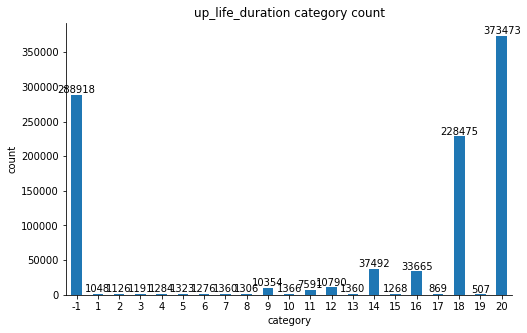

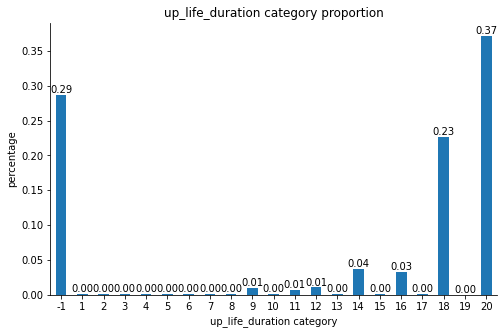

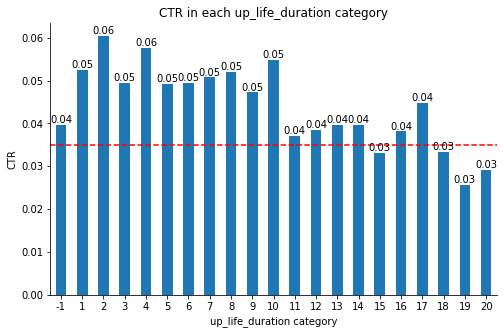

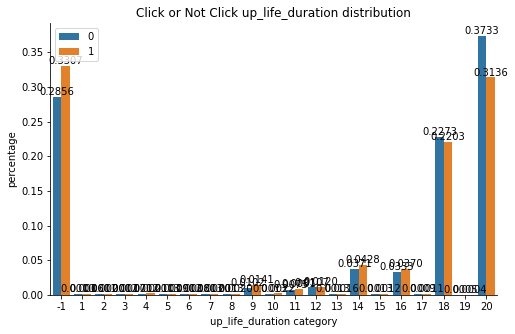

up_life_duration & label chi square test
p-value: 2.2570841756181363e-154
reject H0, up_life_duration and label are dependent




up_membership_grade EDA
up_membership_grade value counts
-1    883808
 1    121180
 2       771
 3       283
Name: up_membership_grade, dtype: int64


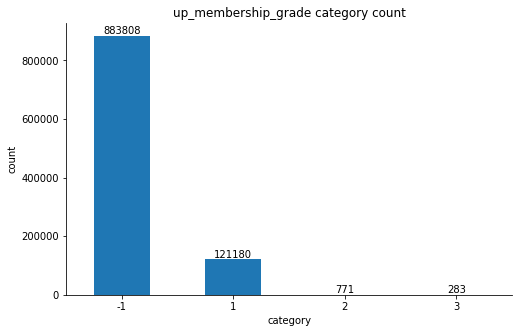

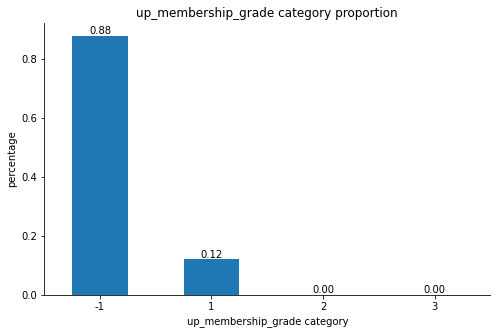

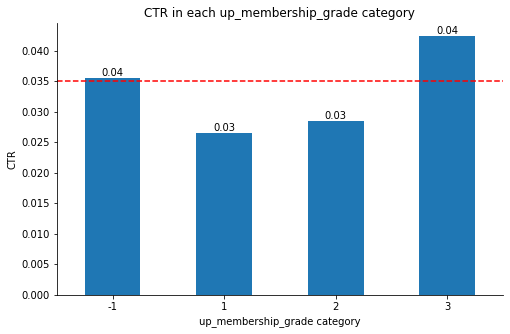

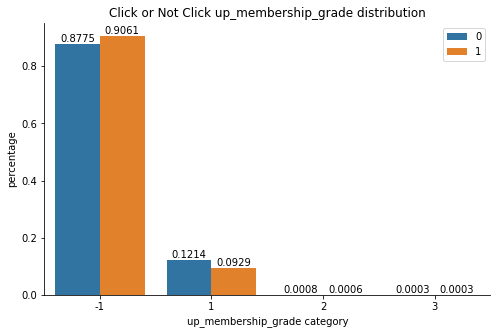

up_membership_grade & label chi square test
p-value: 7.553349927582182e-56
reject H0, up_membership_grade and label are dependent




membership_life_duration EDA
membership_life_duration value counts
-1     1004469
 4           1
 9           1
 11          2
 14         26
 15          6
 16        135
 17          1
 18       1387
 19          6
 20          8
Name: membership_life_duration, dtype: int64


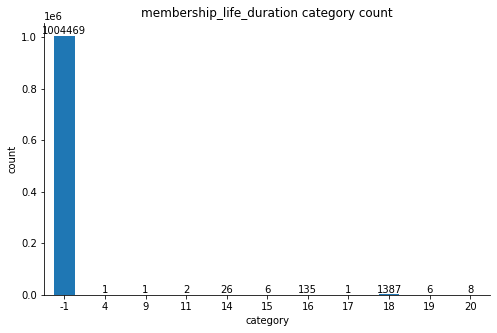

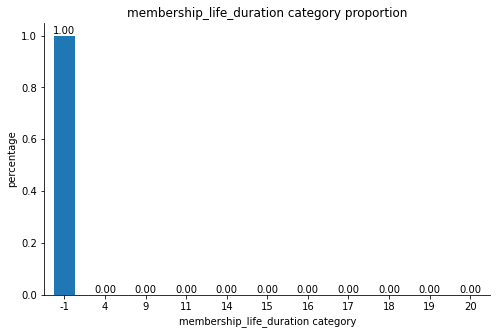

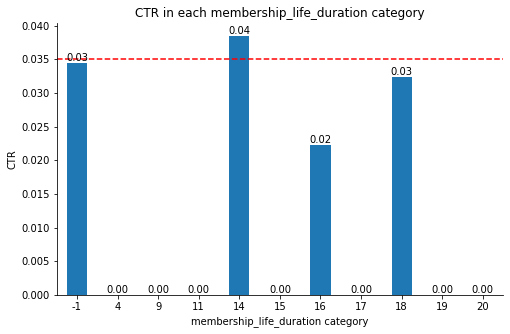

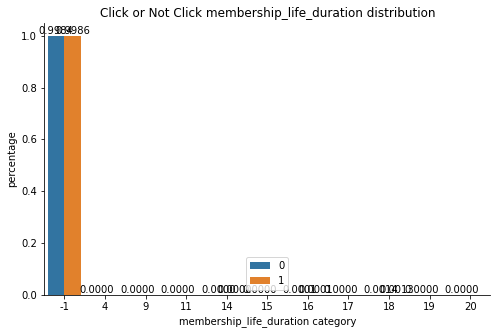

membership_life_duration & label chi square test
p-value: 0.998227113447188
can't reject H0, membership_life_duration is independent from label




consume_purchase EDA
consume_purchase value counts
2     881143
3       9367
4        968
5      56643
6       1623
7      11356
8       6859
9       2714
10     35369
Name: consume_purchase, dtype: int64


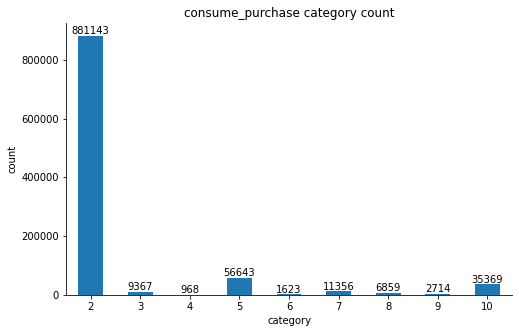

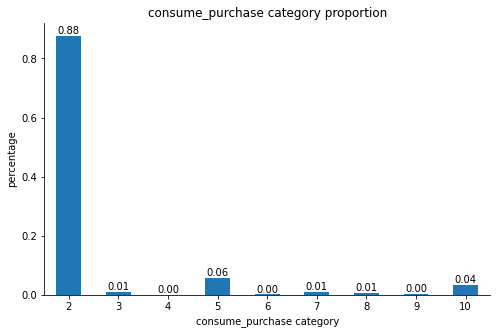

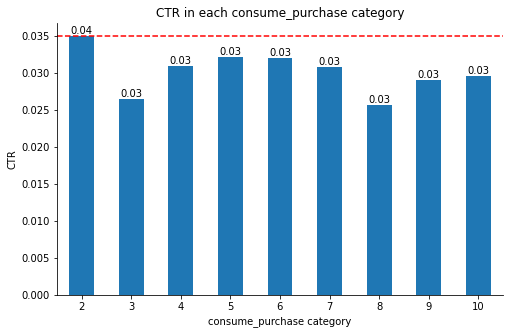

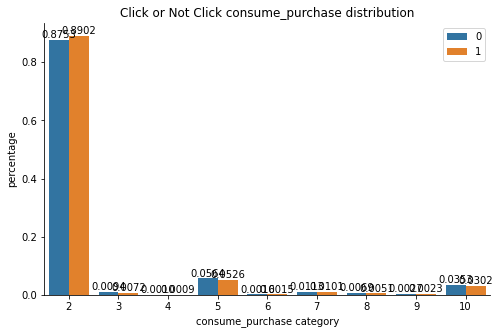

consume_purchase & label chi square test
p-value: 1.0232555882574468e-14
reject H0, consume_purchase and label are dependent




communication_onlinerate_start EDA
communication_onlinerate_start value counts
-1      9520
0     263339
1      95018
10      7282
11      4469
12      2998
13      1985
14      1559
15      1331
16      1202
17      1138
18       999
19       823
2      77893
20       659
21       385
22       251
23       194
3      46520
4      47272
5      99572
6     184060
7     100372
8      42154
9      15047
Name: communication_onlinerate_start, dtype: int64


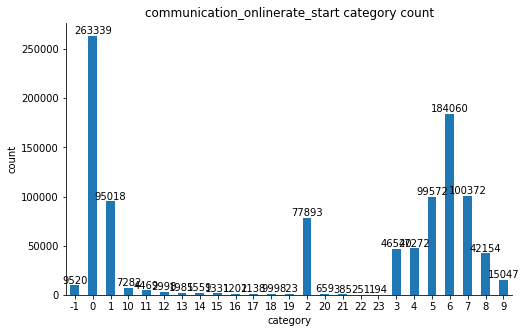

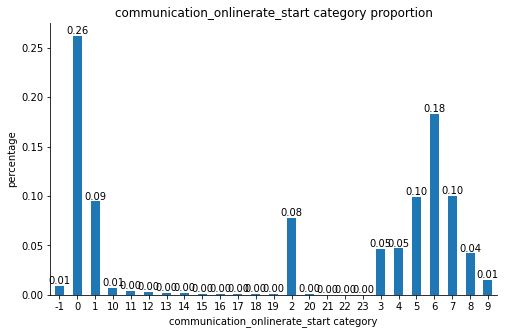

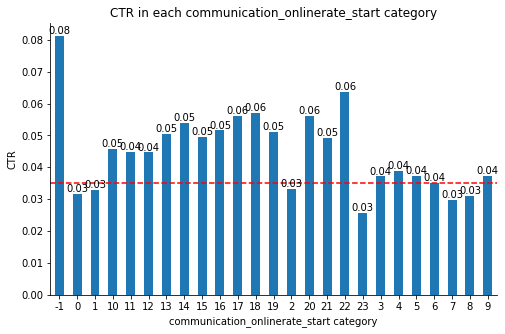

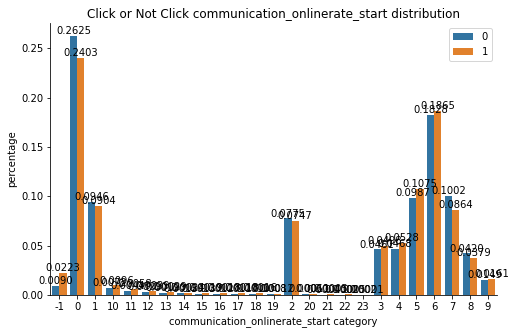

communication_onlinerate_start & label chi square test
p-value: 5.457681288689909e-197
reject H0, communication_onlinerate_start and label are dependent




communication_onlinerate_end EDA
communication_onlinerate_end value counts
-1      9520
10         2
11         4
12        11
13        11
14         7
15        16
16        19
17        45
18        37
19        78
20       162
21       449
22      1367
23    994304
5          1
6          5
7          1
8          3
Name: communication_onlinerate_end, dtype: int64


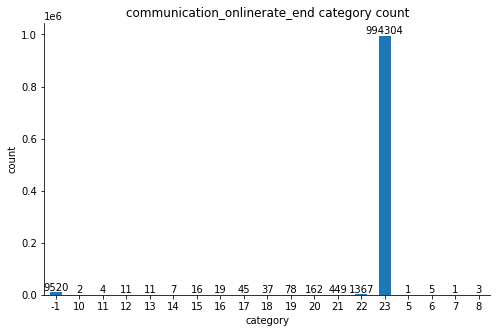

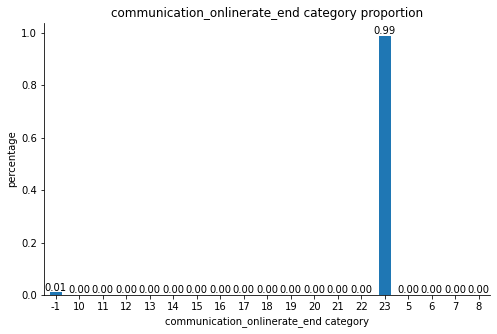

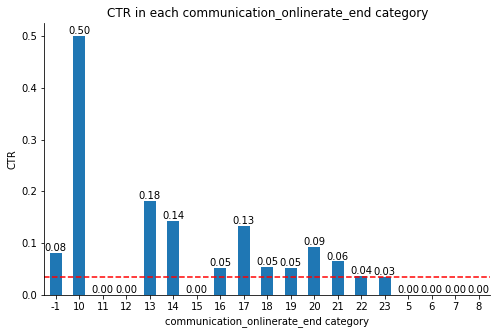

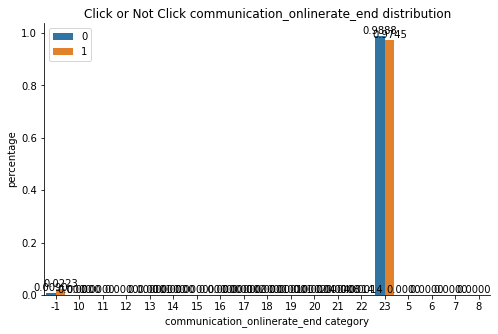

communication_onlinerate_end & label chi square test
p-value: 1.1070413765178317e-136
reject H0, communication_onlinerate_end and label are dependent




comm_time EDA
comm_time value counts
-1       9520
 0        258
 1        285
 2        406
 3        658
 4        818
 5        993
 6       1124
 7       1202
 8       1339
 9       1581
 10      1997
 11      3023
 12      4487
 13      7332
 14     15184
 15     42499
 16    100548
 17    183620
 18     99233
 19     47200
 20     46496
 21     77891
 22     95021
 23    263327
Name: comm_time, dtype: int64


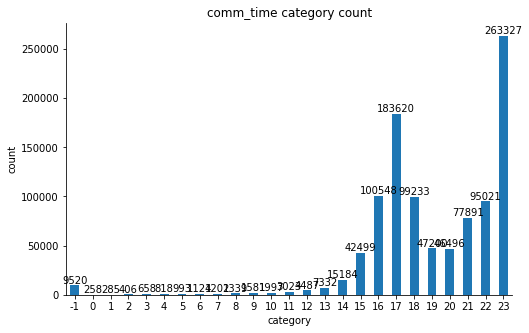

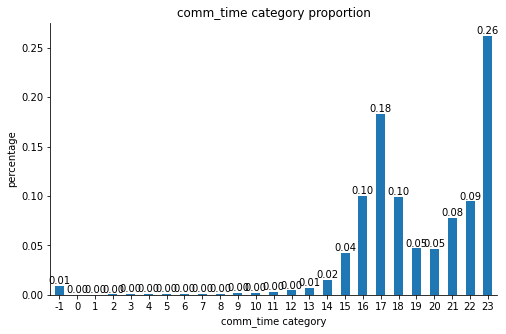

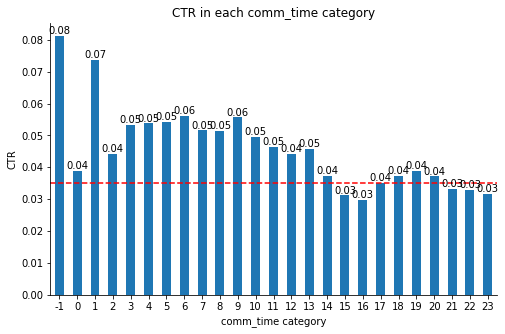

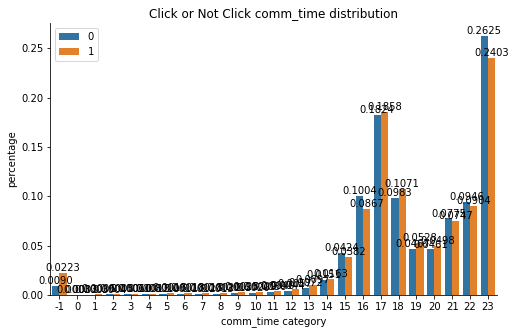

comm_time & label chi square test
p-value: 4.845679144501789e-198
reject H0, comm_time and label are dependent




communication_avgonline_30d EDA
communication_avgonline_30d value counts
-1       3192
 1        304
 2        461
 3       1414
 4       2374
 5       3619
 6       5934
 7      10110
 8      19432
 9      48739
 10    174190
 11    291438
 12    251787
 13    193048
Name: communication_avgonline_30d, dtype: int64


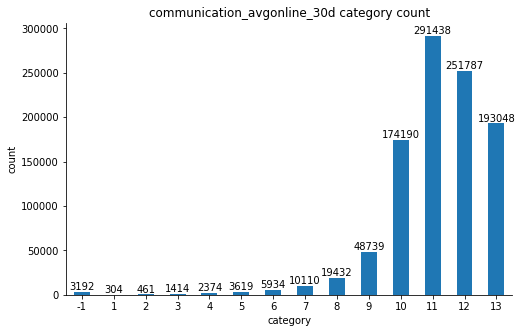

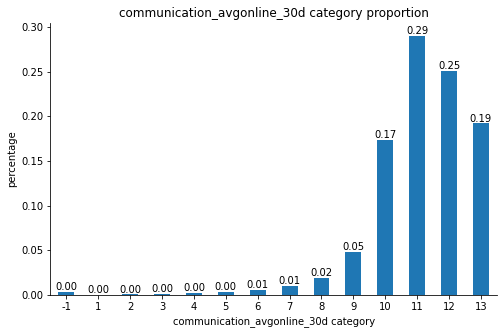

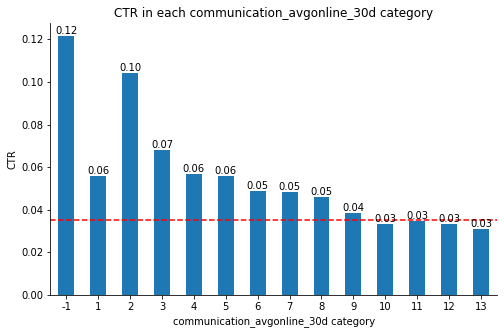

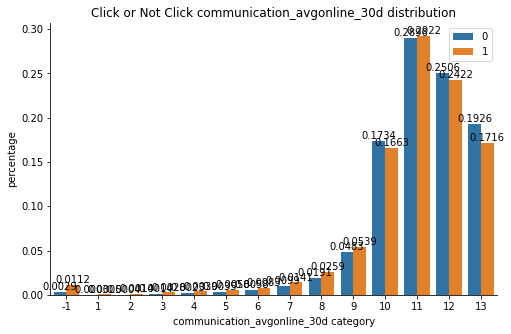

communication_avgonline_30d & label chi square test
p-value: 9.647023251817897e-254
reject H0, communication_avgonline_30d and label are dependent




net_type EDA
net_type value counts
2    799117
3    202051
4      3937
5       812
6       125
Name: net_type, dtype: int64


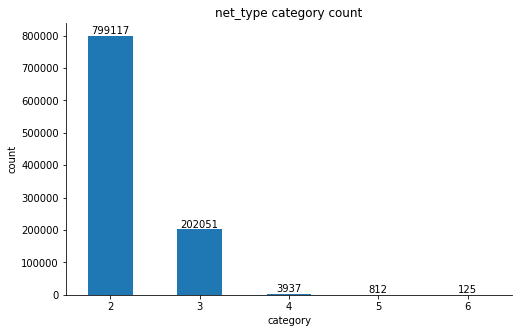

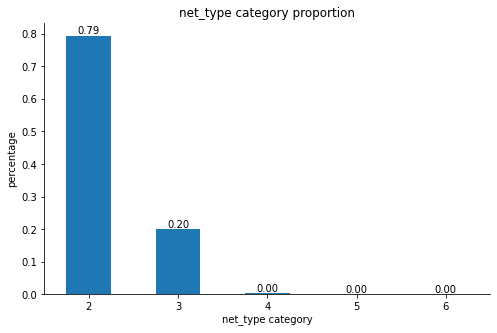

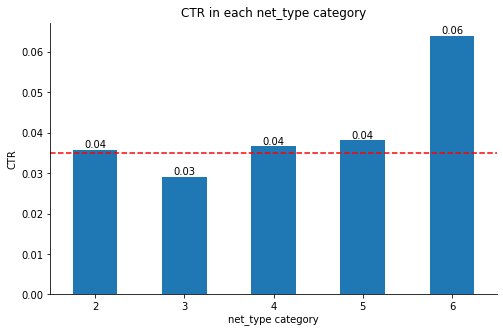

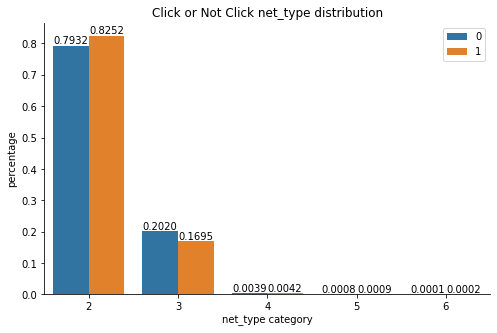

net_type & label chi square test
p-value: 5.49913004554506e-47
reject H0, net_type and label are dependent




pt_d EDA
pt_d value counts
1    150847
2    138448
3    145813
4    141688
5    141001
6    144393
7    143852
Name: pt_d, dtype: int64


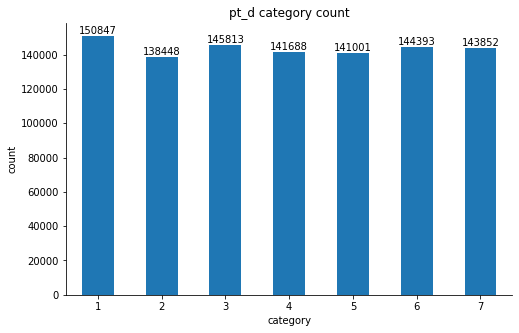

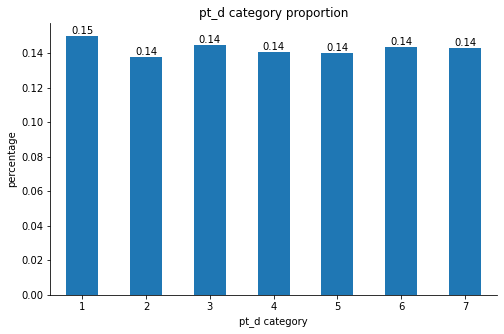

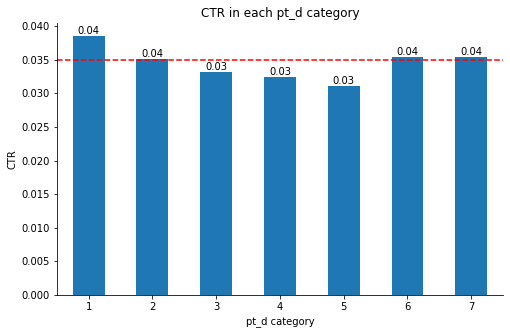

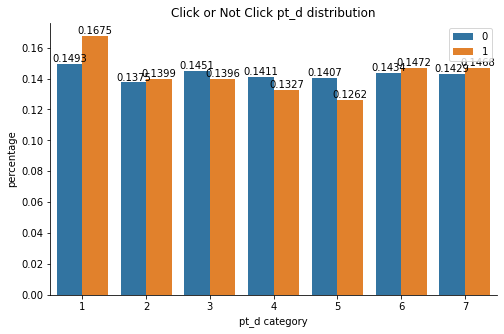

pt_d & label chi square test
p-value: 4.044400985678122e-31
reject H0, pt_d and label are dependent




creat_type_cd EDA
creat_type_cd value counts
2      7104
3     72332
4     18754
5     16178
6    151037
7    691670
8     44981
9      3986
Name: creat_type_cd, dtype: int64


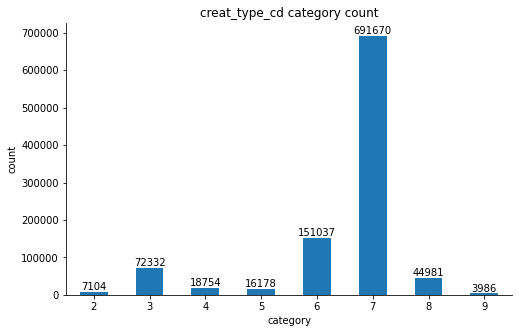

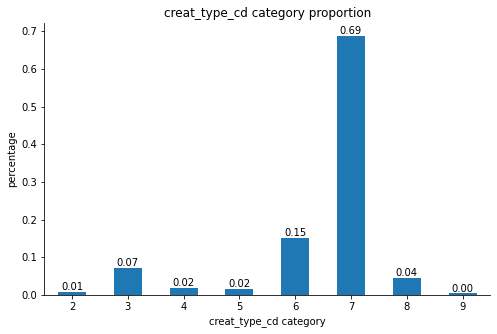

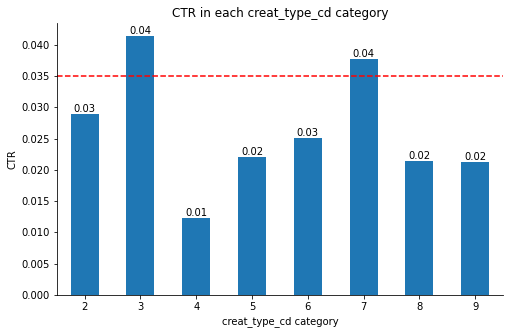

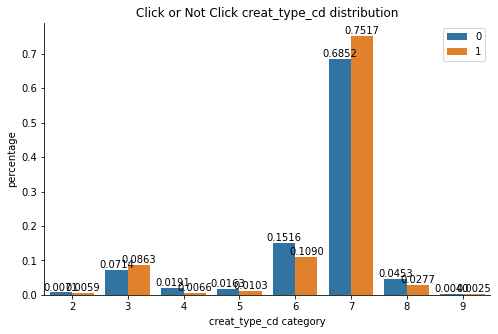

creat_type_cd & label chi square test
p-value: 2.298750278702319e-284
reject H0, creat_type_cd and label are dependent




adv_prim_id EDA
adv_prim_id value counts
101      120
102     3722
103      185
104    18807
105      806
       ...  
209     4787
210    19311
212      322
213     1694
214     2726
Name: adv_prim_id, Length: 101, dtype: int64


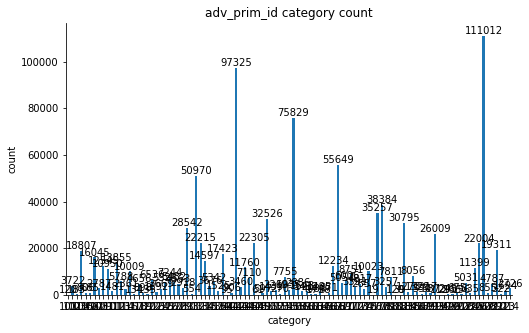

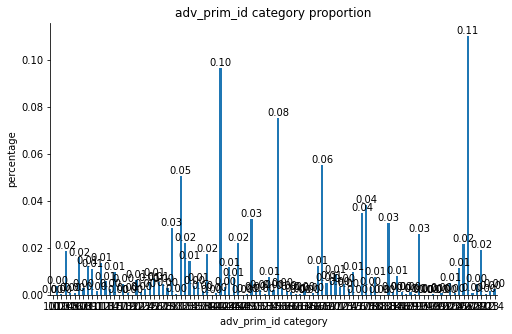

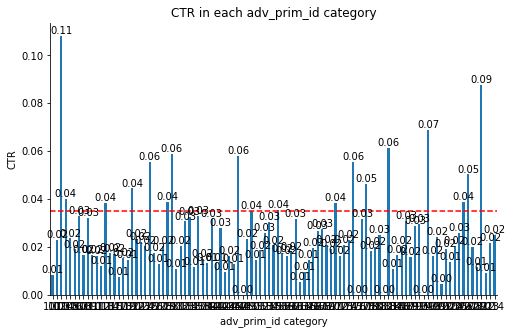

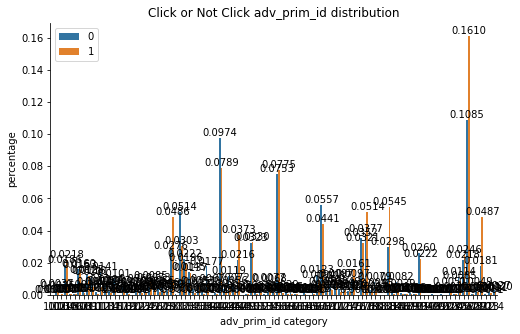

adv_prim_id & label chi square test
p-value: 0.0
reject H0, adv_prim_id and label are dependent




dev_id EDA
dev_id value counts
11       541
12      5413
13      2646
14       344
15     19640
16      3520
17    170227
18      6995
19      7598
20      2886
22       188
23        39
24      1302
26      2739
27      8751
29     56239
30     27229
32       215
33      1329
34       126
35       529
36     81097
37    146911
38      7999
39      2592
40      1093
41       136
42       125
43      6258
46      6379
47      1071
48       806
49        19
50        61
51       195
52      4730
53      1273
54      8122
55     14597
56    111510
57       629
58      1350
59      5955
60    216665
61      4589
62       452
63       120
64     20742
65       534
67     10233
68      2290
69      5869
70     21578
71      1446
72       120
Name: dev_id, dtype: int64


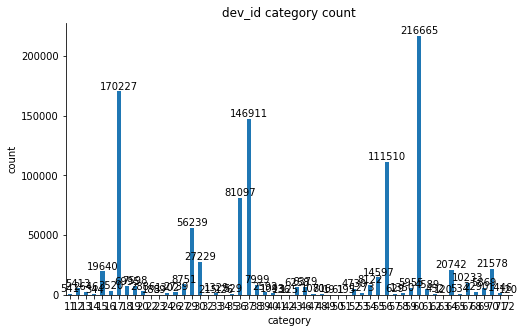

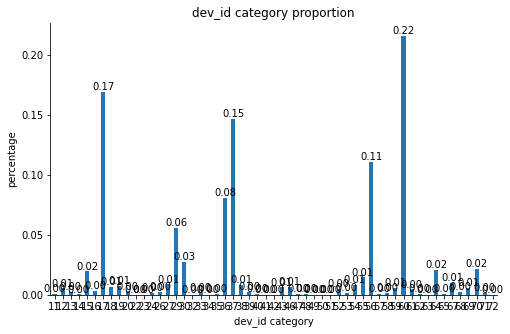

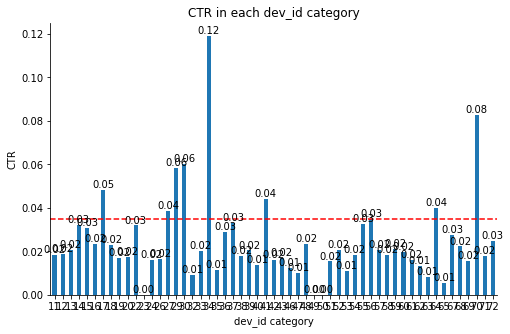

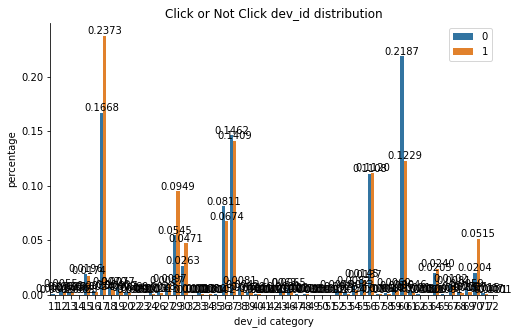

dev_id & label chi square test
p-value: 0.0
reject H0, dev_id and label are dependent




inter_type_cd EDA
inter_type_cd value counts
2      5788
3    121986
4     94918
5    783350
Name: inter_type_cd, dtype: int64


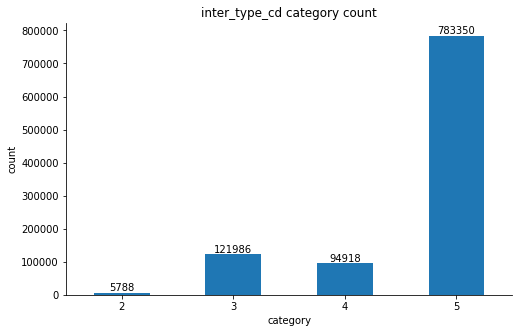

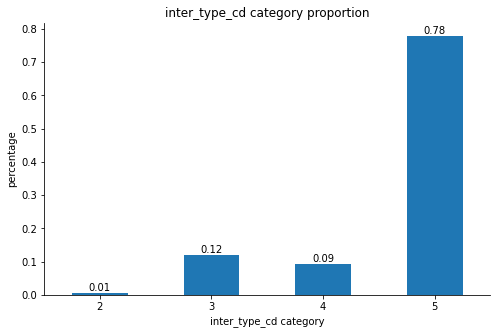

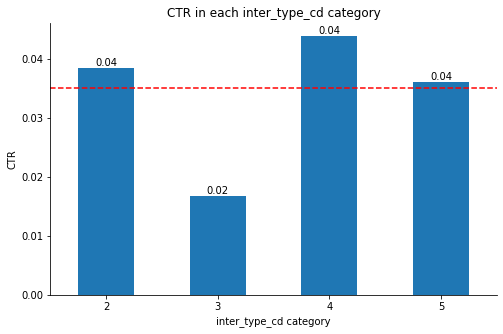

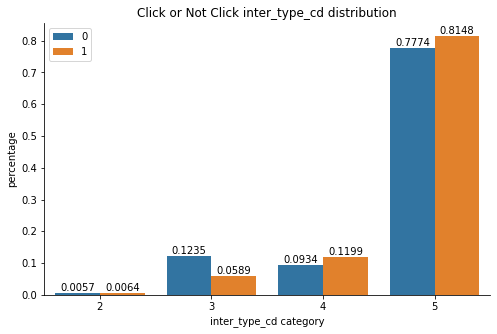

inter_type_cd & label chi square test
p-value: 0.0
reject H0, inter_type_cd and label are dependent




slot_id EDA
slot_id value counts
11    100817
12    219091
13     74309
14     61032
15     26438
16    112720
17    200011
18     70313
19     33526
20      1652
21     86295
22     19838
Name: slot_id, dtype: int64


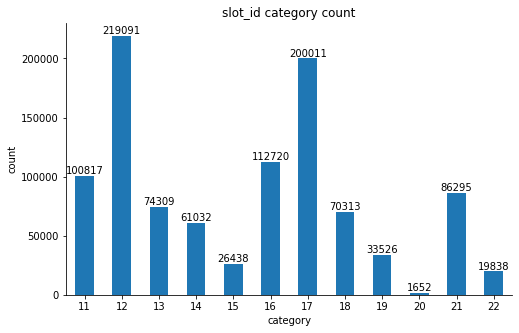

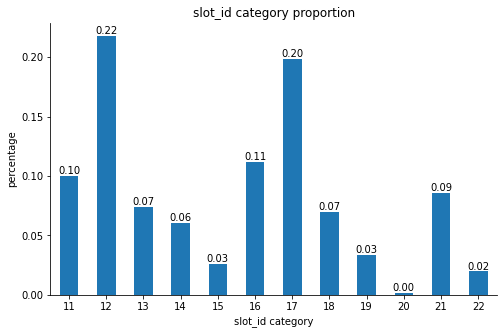

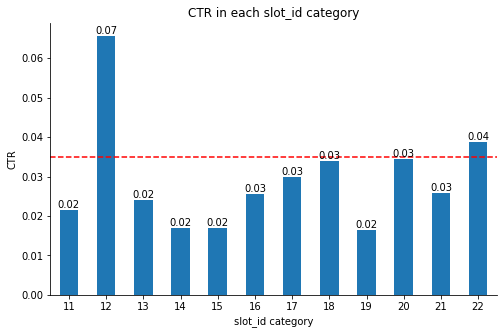

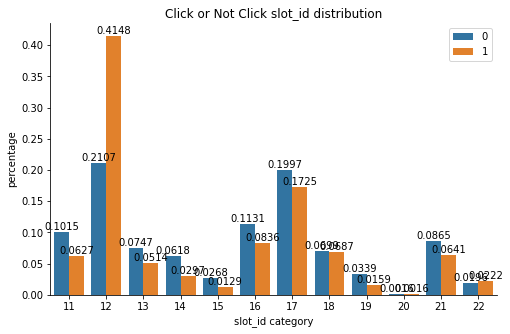

slot_id & label chi square test
p-value: 0.0
reject H0, slot_id and label are dependent




indu_name EDA
indu_name value counts
11      3952
12      2739
13      2257
14     25112
15       124
16      7125
17    427159
18     11484
19       125
20      2129
21      2654
22      4980
23       166
24     84111
25      8955
26     11135
27     34342
29      3279
30     10030
31       529
32     10209
33     11803
34      4021
36    136316
37      2809
38     19805
39      3008
40      4758
41        18
42     92539
45       134
46      7244
47     50970
48       215
49       470
50      7959
51     10244
52      1133
Name: indu_name, dtype: int64


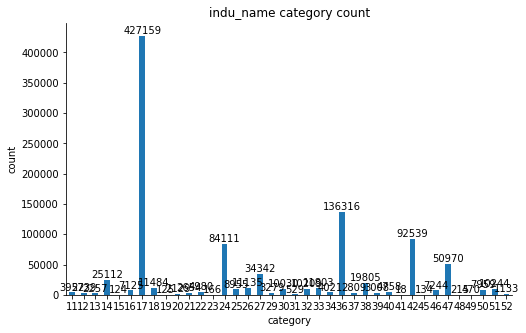

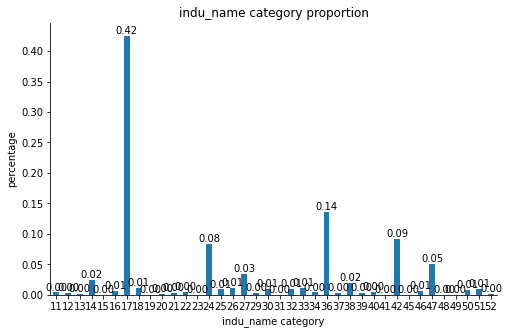

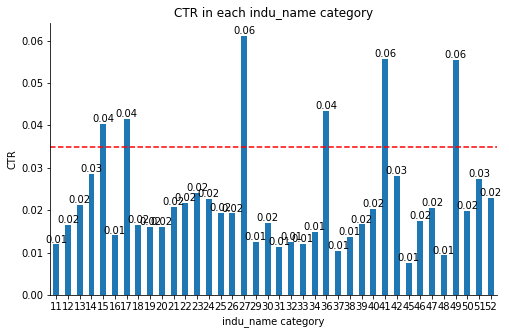

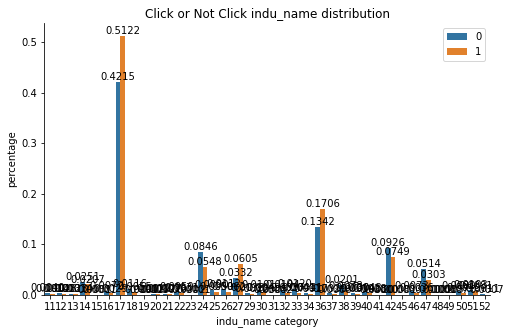

indu_name & label chi square test
p-value: 0.0
reject H0, indu_name and label are dependent




tags EDA
tags value counts
11     19849
12       675
13     26297
14       587
15      1525
17       906
18     26549
19      7390
20        39
21       134
22       156
23    109772
24      7667
25     11760
26      4872
27      9415
28     10950
30      1028
31       635
32     11399
33       735
34       685
35        61
36      2366
37    313275
38      2361
39    148113
40    149730
41    125574
42     11537
Name: tags, dtype: int64


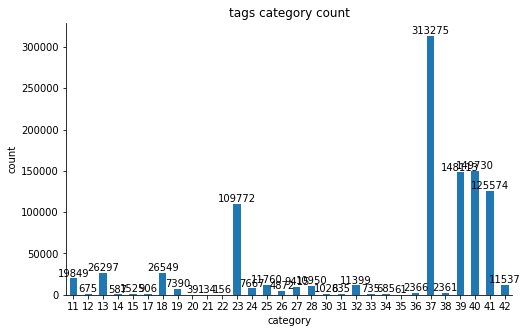

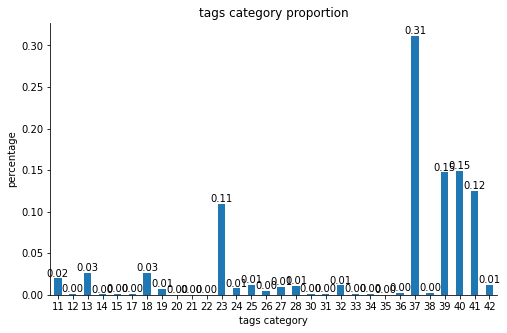

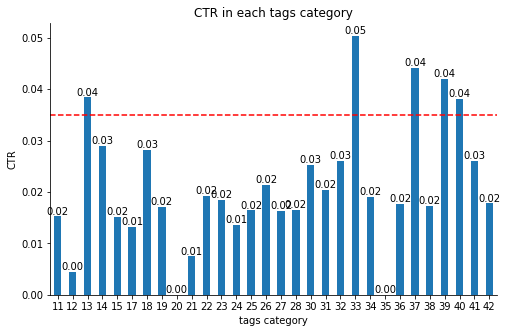

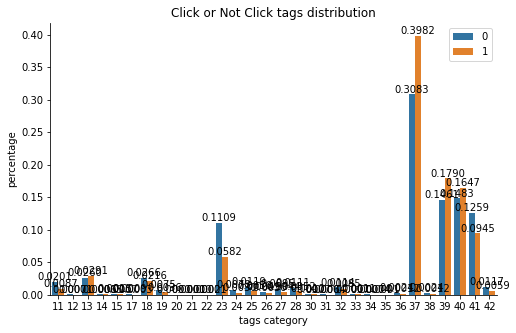

tags & label chi square test
p-value: 0.0
reject H0, tags and label are dependent




app_first_class EDA
app_first_class value counts
2    216665
3      5557
4    783820
Name: app_first_class, dtype: int64


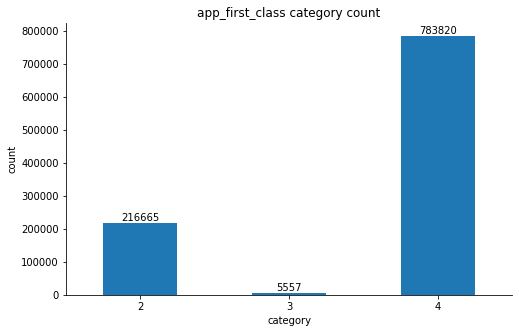

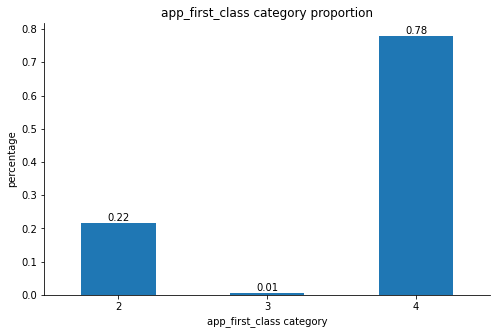

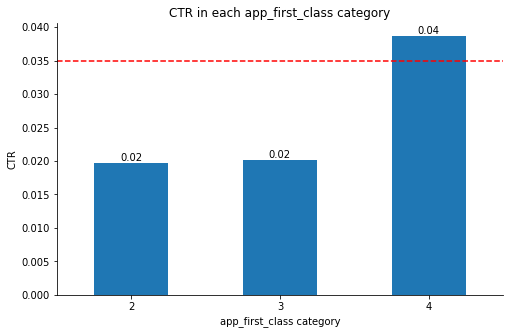

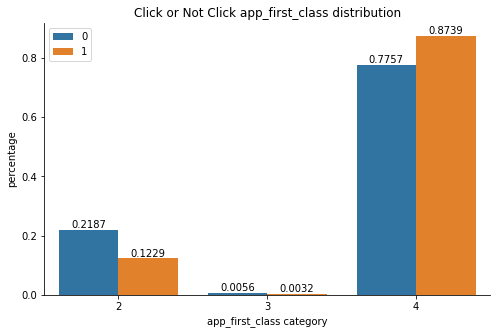

app_first_class & label chi square test
p-value: 0.0
reject H0, app_first_class and label are dependent




app_second_class EDA
app_second_class value counts
11      5664
12      8065
13      9415
14       635
15      2945
16      2400
17    159711
18      1148
19       156
20     19849
21    320942
22      7358
23    104774
24       587
25    176027
26    125708
27     10950
28     11760
29     37948
Name: app_second_class, dtype: int64


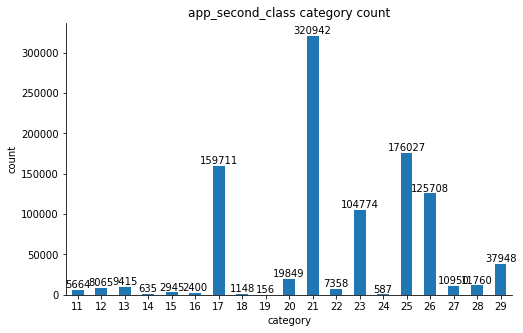

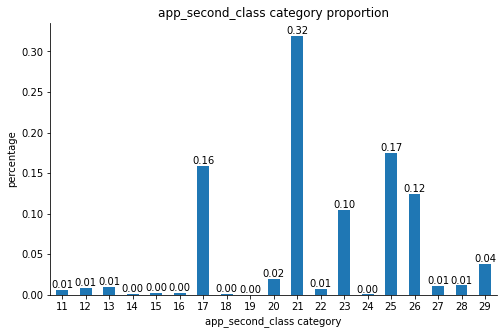

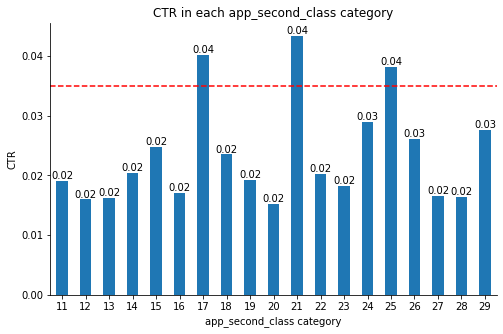

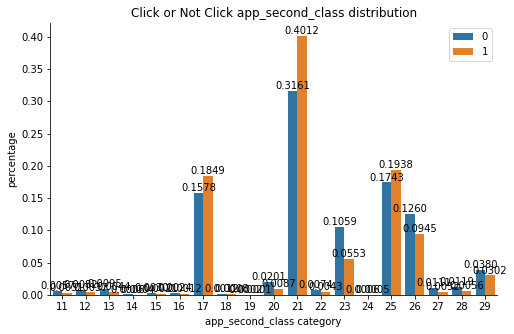

app_second_class & label chi square test
p-value: 0.0
reject H0, app_second_class and label are dependent




his_app_size EDA
his_app_size value counts
-1     216665
 2      34176
 3       1273
 4     184045
 5      81852
 6     123340
 7       3461
 8      14055
 9      78851
 10       629
 11     17355
 12      1259
 13     46392
 14     95679
 15     10233
 16     28447
 17     35419
 18     10570
 19      9628
 20     10983
 21      1730
Name: his_app_size, dtype: int64


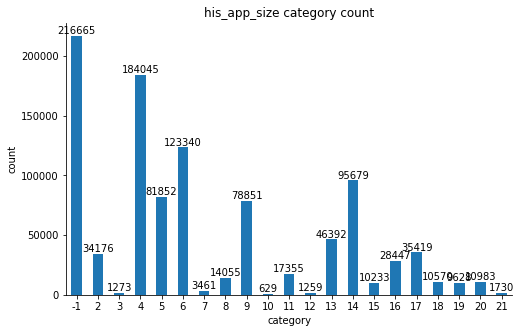

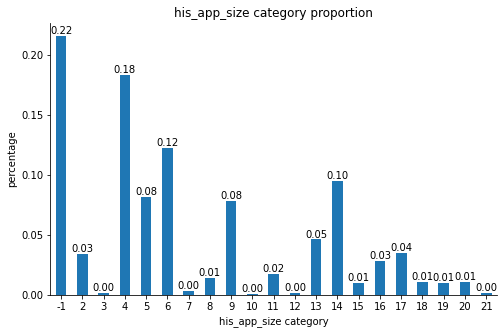

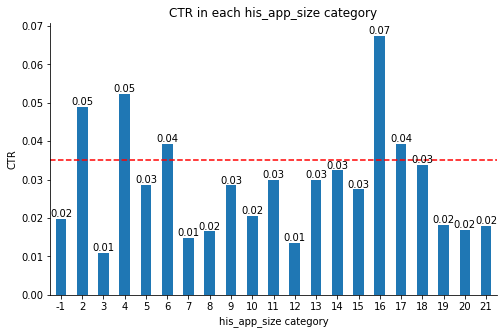

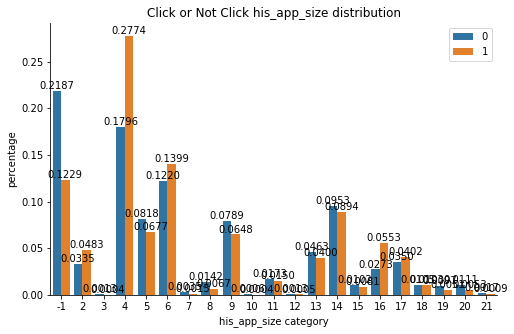

his_app_size & label chi square test
p-value: 0.0
reject H0, his_app_size and label are dependent




his_on_shelf_time EDA
his_on_shelf_time value counts
-1    216665
 1       120
 2    104529
 3    684728
Name: his_on_shelf_time, dtype: int64


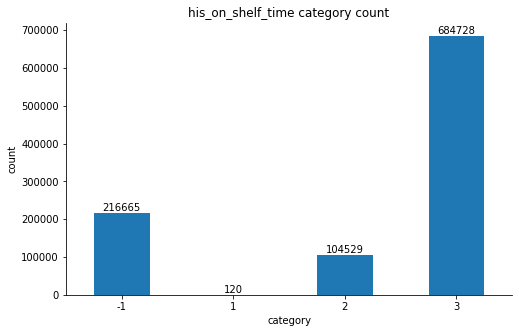

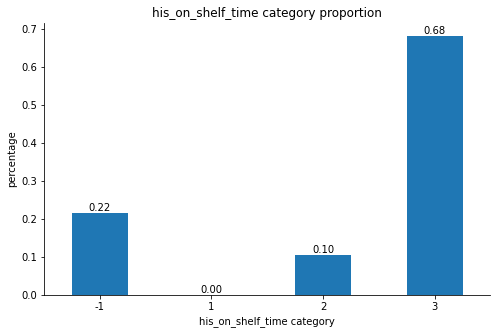

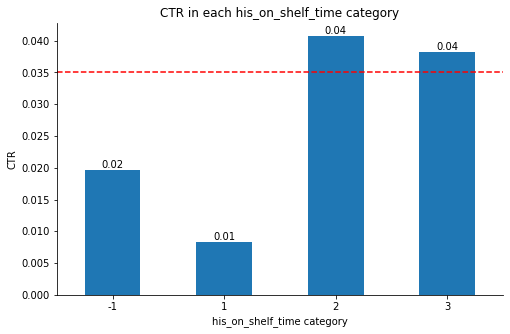

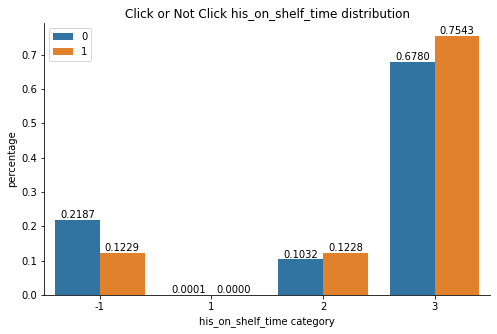

his_on_shelf_time & label chi square test
p-value: 0.0
reject H0, his_on_shelf_time and label are dependent




app_score EDA
app_score value counts
1    217194
2    788848
Name: app_score, dtype: int64


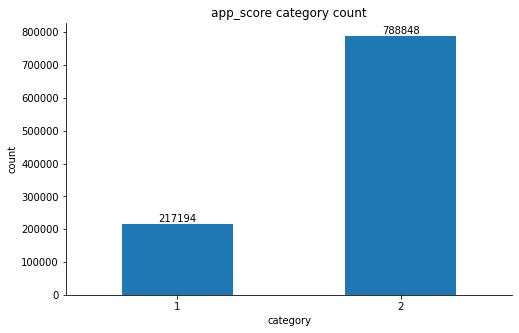

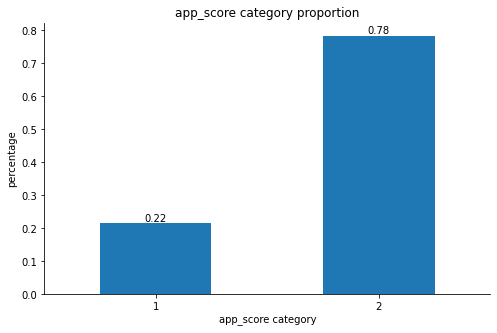

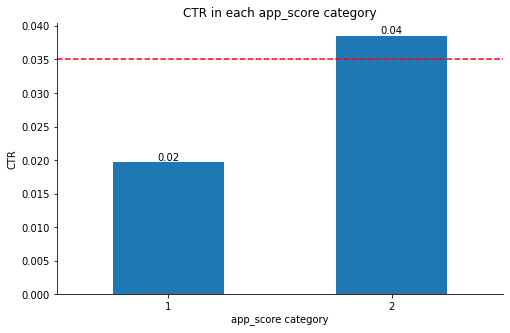

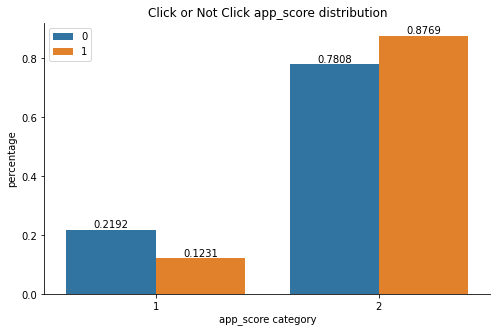

app_score & label chi square test
p-value: 0.0
reject H0, app_score and label are dependent




device_size EDA
device_size value counts
102       1
103    2918
104     342
105      16
109      18
       ... 
343      27
344       1
346      30
348      27
349     186
Name: device_size, Length: 146, dtype: int64


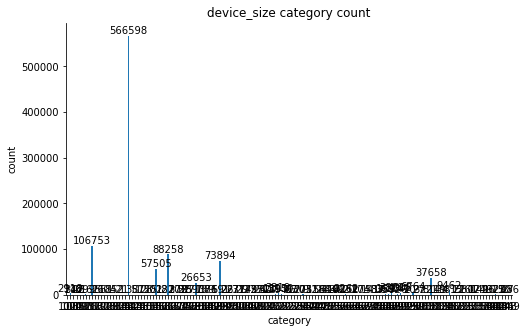

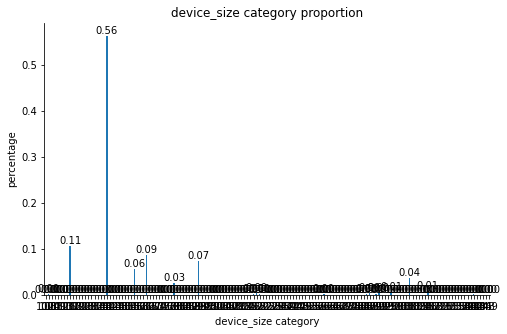

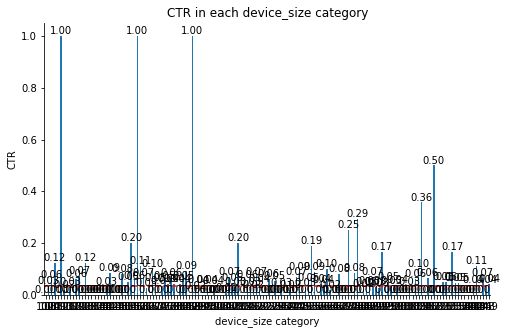

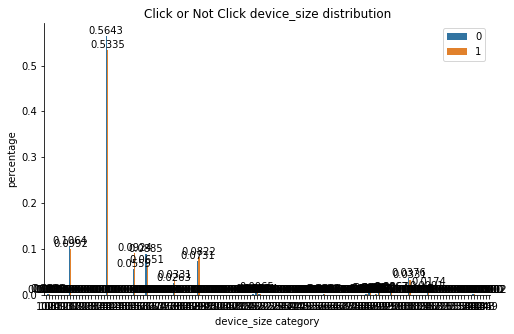

device_size & label chi square test
p-value: 1.005354366132e-311
reject H0, device_size and label are dependent




emui_dev EDA
emui_dev value counts
11       455
12     81889
14    189830
15      2426
16      2144
17     22554
18      1076
19     20966
20    519511
21         4
23         4
24       853
25     10735
26      8754
27     76835
28     68006
Name: emui_dev, dtype: int64


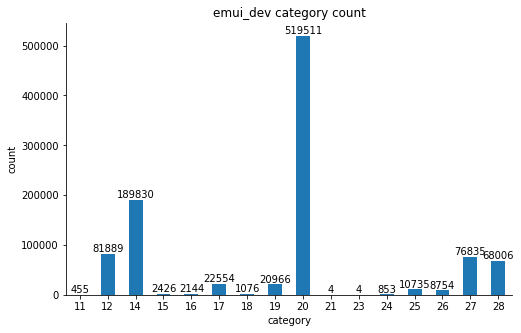

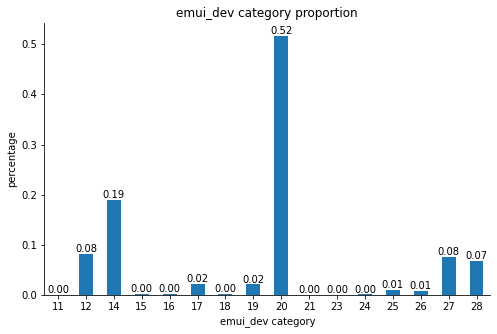

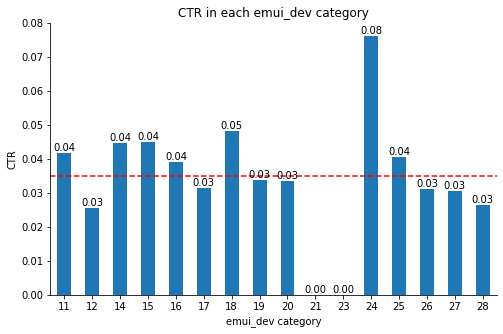

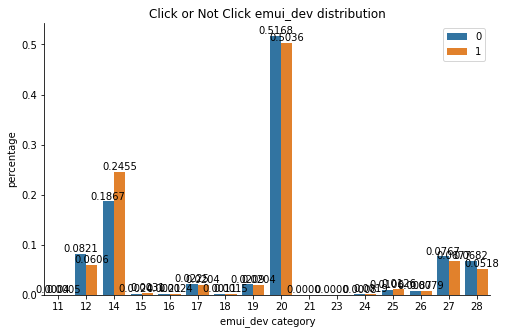

emui_dev & label chi square test
p-value: 4.0744119343698577e-218
reject H0, emui_dev and label are dependent




list_time EDA
list_time value counts
-2        449
-1       2682
 4     150282
 5      67973
 6      10934
 7      51520
 8     154136
 9     174684
 10     73689
 11      2386
 12    104752
 13     38631
 14    101056
 15     33108
 16      8684
 17     31076
Name: list_time, dtype: int64


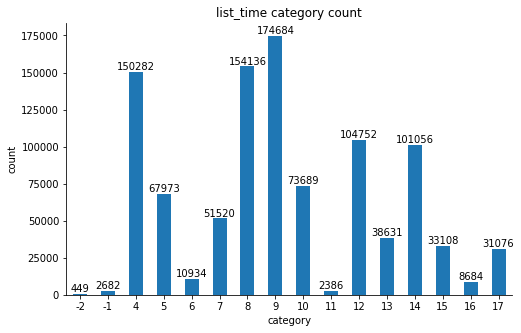

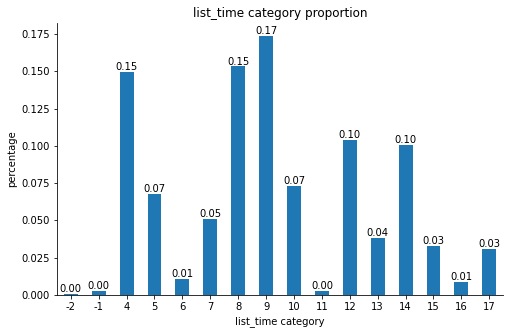

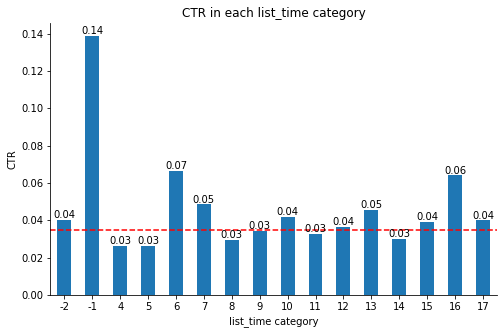

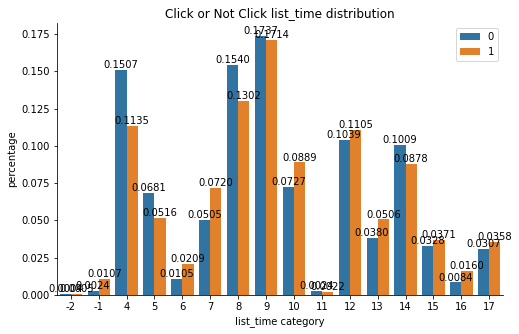

list_time & label chi square test
p-value: 0.0
reject H0, list_time and label are dependent




device_price EDA
device_price value counts
-1      2682
 1     46612
 2    180579
 3    215874
 4    358933
 5    200913
 7       449
Name: device_price, dtype: int64


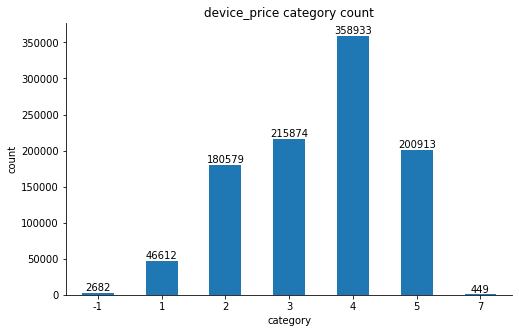

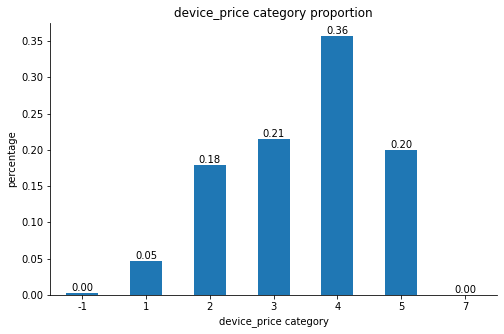

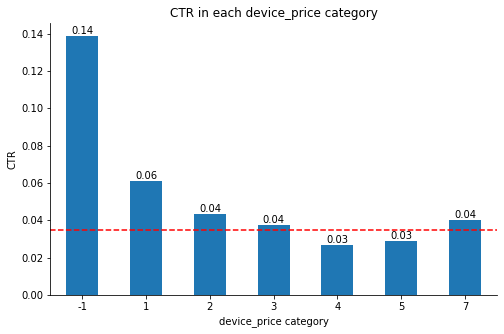

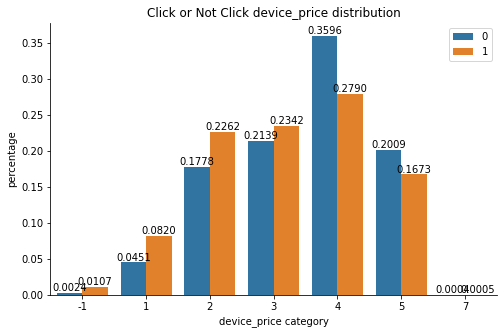

device_price & label chi square test
p-value: 0.0
reject H0, device_price and label are dependent






In [21]:
for id_col in feature_map:
    for feature in feature_map[id_col]:
        print(f"{feature} EDA")
        categorical_analysis(train_df, feature, id_col)
        print("="*80)
        print("\n"*3)

## Most features are dependent to each other

In [22]:
from itertools import combinations
from functools import reduce

In [23]:
for pair in combinations(reduce(lambda x,y:x+y,feature_map.values()) + ['label'],2):
    agg_df = train_df[[pair[0],pair[1],'uid']].groupby([pair[0],pair[1]]).count().reset_index()
    agg_df = pd.pivot_table(agg_df, values='uid', index=pair[0], columns=pair[1]).fillna(0)
    chi2, p, dof, expect =  chi2_contingency(agg_df)
    if p >= 0.05:
        print(pair)
        print(f"p-value: {p}")
        print(f"can't reject H0, {pair[0]} is independent from {pair[1]}" if p > 0.05 else f"reject H0, {pair[0]} and {pair[1]} are dependent")
        print("="*80)
        print("\n"*2)

('city_rank', 'membership_life_duration')
p-value: 0.3418310123150074
can't reject H0, city_rank is independent from membership_life_duration



('up_membership_grade', 'pt_d')
p-value: 0.08954511229795757
can't reject H0, up_membership_grade is independent from pt_d



('membership_life_duration', 'communication_onlinerate_end')
p-value: 1.0
can't reject H0, membership_life_duration is independent from communication_onlinerate_end



('membership_life_duration', 'pt_d')
p-value: 0.33902497619237787
can't reject H0, membership_life_duration is independent from pt_d



('membership_life_duration', 'creat_type_cd')
p-value: 0.839569882663158
can't reject H0, membership_life_duration is independent from creat_type_cd



('membership_life_duration', 'adv_prim_id')
p-value: 1.0
can't reject H0, membership_life_duration is independent from adv_prim_id



('membership_life_duration', 'dev_id')
p-value: 0.9999999730401063
can't reject H0, membership_life_duration is independent from dev_id





In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [36]:
feature_map

{'uid': ['age',
  'city',
  'city_rank',
  'residence',
  'career',
  'gender',
  'up_life_duration',
  'up_membership_grade',
  'membership_life_duration',
  'consume_purchase',
  'communication_onlinerate_start',
  'communication_onlinerate_end',
  'comm_time',
  'communication_avgonline_30d',
  'net_type',
  'pt_d'],
 'task_id': ['creat_type_cd',
  'adv_prim_id',
  'dev_id',
  'inter_type_cd',
  'slot_id',
  'indu_name'],
 'spread_app_id': ['tags',
  'app_first_class',
  'app_second_class',
  'his_app_size',
  'his_on_shelf_time',
  'app_score'],
 'device_name': ['device_size', 'emui_dev', 'list_time', 'device_price']}

task_id
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19
cluster 20


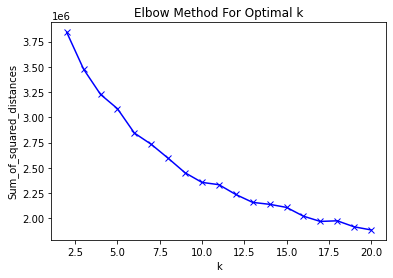

spread_app_id
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19
cluster 20


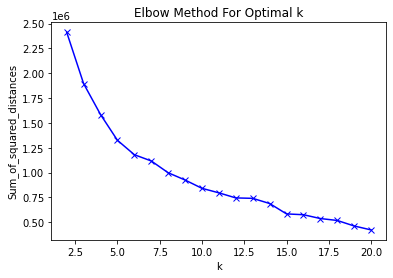

device_name
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19
cluster 20


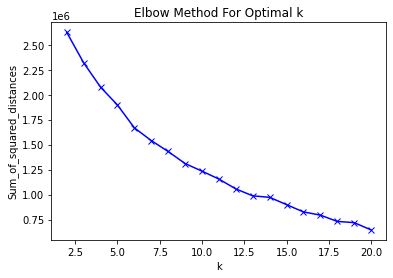

In [39]:
for id_col in feature_map:
    if id_col == 'uid':
        continue
    print(id_col)
    one_hot_enc = OneHotEncoder(categories='auto')
    encode_df = one_hot_enc.fit_transform(train_df[feature_map[id_col]])
    
    Sum_of_squared_distances = []
    k_list = range(2,21)
    for k in k_list:
        print(f"cluster {k}")
        km = KMeans(n_clusters=k)
        km.fit(encode_df)
        Sum_of_squared_distances.append(km.inertia_)
    
    plt.plot(k_list, Sum_of_squared_distances, 'bx-');
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()